In [ ]:
# Real data from dataset of housing prices as published in the Journal of Applied Econometrics

In [1]:
# Import packages

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



In [2]:
# Read in the data

df = pd.read_csv("C:/Users/rakim/Downloads/DS_-_homeprices.applied.econ.csv")

In [4]:
# First five rows

df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [3]:
# Last five rows

df.tail()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no
545,105000.0,6000,3,1,2,yes,no,no,no,yes,1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [6]:
df.shape

(546, 12)

In [7]:
df.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# Split up the dataset

ac_yes = df[(df["airco"] == "yes")]
ac_yes.info()

ac_no = df[(df["airco"] == "no")]
ac_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     173 non-null    float64
 1   lotsize   173 non-null    int64  
 2   bedrooms  173 non-null    int64  
 3   bathrms   173 non-null    int64  
 4   stories   173 non-null    int64  
 5   driveway  173 non-null    object 
 6   recroom   173 non-null    object 
 7   fullbase  173 non-null    object 
 8   gashw     173 non-null    object 
 9   airco     173 non-null    object 
 10  garagepl  173 non-null    int64  
 11  prefarea  173 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     373 non-null    float64
 1   lotsize   373 non-null    int64  
 2   bedrooms  373 non-

In [ ]:
# 1) Do homes with air conditioning have a higher sales price than homes without air conditioning?

In [ ]:
# Hypotheses: 
""" 
Null hypothesis: On average, there is not a difference in sales price between homes with air conditioning and those without air conditioning. 
Alternative hypothesis: On average, there is a difference in sales price between homes with air conditioning and those without air conditioning. 
"""

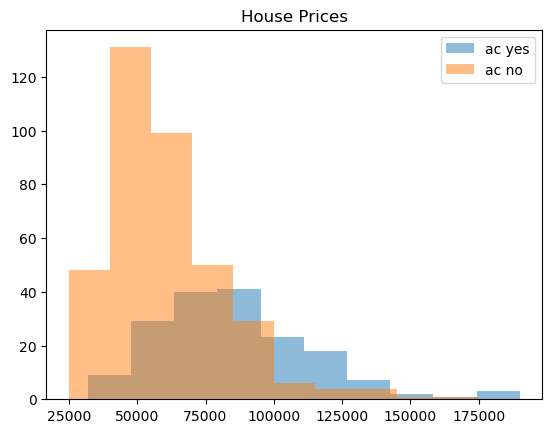

In [9]:
# Histogram 

plt.hist(ac_yes["price"], alpha = .5, label = "ac yes")
plt.hist(ac_no["price"], alpha = .5, label = "ac no")
plt.legend(loc = "upper right")
plt.title("House Prices")
plt.show()

In [10]:
# Skewness Kurtosis of ac_yes

print(stats.describe(ac_yes["price"]))


DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)


In [11]:
# Skewness and Kurtosis of ac_no

print(stats.describe(ac_no["price"]))

DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.9862637, skewness=1.4196100209360347, kurtosis=3.448225770991252)


In [ ]:
# Statistical test assumptions: 
# For this exercise, normal distribution was the focus for a t-test. 


In [ ]:
""" Findings 

Data is not normally distributed. Therefore, a t-test was not performed to ascertain the differences between groups. 

"""

In [ ]:
# 2) Do homes with a full basement have a higher sales price than homes without a full basement?

In [12]:
# Split up the dataset

fullbase_yes = df[(df["fullbase"] == "yes")]
fullbase_yes.info()

fullbase_no = df[(df["fullbase"] == "no")]
fullbase_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     191 non-null    float64
 1   lotsize   191 non-null    int64  
 2   bedrooms  191 non-null    int64  
 3   bathrms   191 non-null    int64  
 4   stories   191 non-null    int64  
 5   driveway  191 non-null    object 
 6   recroom   191 non-null    object 
 7   fullbase  191 non-null    object 
 8   gashw     191 non-null    object 
 9   airco     191 non-null    object 
 10  garagepl  191 non-null    int64  
 11  prefarea  191 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     355 non-null    float64
 1   lotsize   355 non-null    int64  
 2   bedrooms  355 non-

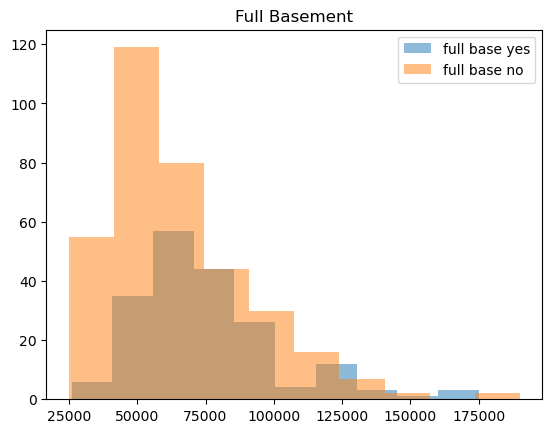

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816343, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


In [15]:
# Plot the histogram 

plt.hist(fullbase_yes["price"], alpha = .5, label = "full base yes")
plt.hist(fullbase_no["price"], alpha = .5, label = "full base no")
plt.legend(loc = "upper right")
plt.title("Full Basement")
plt.show()

print(stats.describe(fullbase_yes["price"]))
print(stats.describe(fullbase_no["price"]))
                                 

In [ ]:
# Since these variables are a bit more normally distributed than the first attempt, we will perform a t-test. 

In [16]:
# T-test 

stats.ttest_ind(fullbase_yes["price"], fullbase_no["price"])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [17]:
# Function to calculate 95% confidence interval

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(fullbase_yes['price'], fullbase_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.'

[[Text(0, 0, 'fullbase_yes'), Text(1, 0, 'fullbase_no')]]

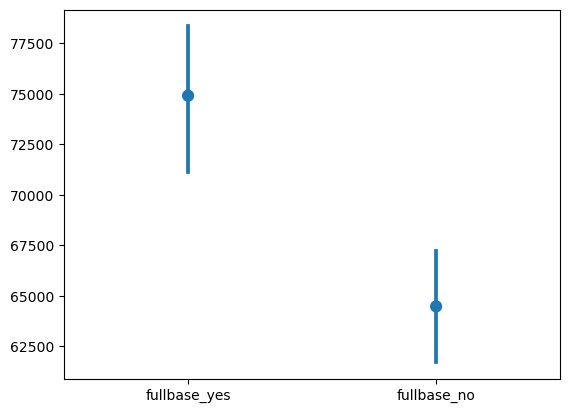

In [18]:
import seaborn as sns

g = sns.pointplot(data = [fullbase_yes["price"], fullbase_no["price"]], join = False)

g.set(xticklabels = ["fullbase_yes", "fullbase_no"])

In [ ]:
# Findings 

# Since the p-value is 1.1885626562866786e-05 and is greater than 0.05 significance level, we cannot reject the null hypothesis. This means
# that on average the house price mean of houses with full basements and without full basements are not significantly different. 